
You are given the data consisting of various features of houses at an unknown place. You are required to predict the sale price of the data of the houses, you may use MLR(Multi Linear regression) for this task.
> The dataset for this task can be downloaded at: https://drive.google.com/file/d/13ILRFONUoDsxuJdLseTLj3e3sHTxROGU/view?usp=share_link

> Also tell the features which affect the house pricing the most i.e. do some data analysis on the data and do so by the help by various maps like we discussed in the online meet we did. And also try some innovative ideas using the dataset that you may figure out.

> Also here is the column descriptions for the dataset:
* date : Date of transaction
* price : Price of house
* bedrooms, bathrooms : Number
* sqft_living, sqft_lot : The Original square footage of the living and lot space when the house was built
* floors : Total floors in the house
* waterfront: Whether the house is on a waterfront(1: yes, 0: no)
* view : special view?
* condition : Condition of the house
* grade : Simply put, the grade or grading around your house is the level of the ground. The ground level and how it's graded is the deciding factor of where storm water will flow
* sqft_above,sqft_basement : Square footage of house apart from basement and basement area
* yr_built : Built year
* yr_renovated : Year when the house was renovated
* zipcode, lat, long : zip code, latitude and logtitude coordinate of the house
* sqft_living15, sqft_lot15 : The latest square footage of the living and lot space ( was taken in 2015 )




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/Training_Data.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df.size


419958

In [ ]:
df.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,6371000148,20141125T000000,439108.0,2,1.50,1130,1340,2.0,0,0,...,8,910.0,220,2008,0,98116,47.5761,-122.410,1310,1340
19994,301400850,20150220T000000,260000.0,3,2.25,1489,2800,2.0,0,0,...,7,1489.0,0,2011,0,98002,47.3452,-122.215,1584,3200
19995,1123049232,20140606T000000,279000.0,5,2.50,2690,5557,2.0,0,0,...,7,2690.0,0,2012,0,98178,47.4914,-122.253,2090,10500
19996,3654200037,20150330T000000,380000.0,3,2.25,1530,1305,2.0,0,0,...,7,1116.0,414,2007,0,98177,47.7034,-122.357,1320,1427


<ipython-input-6-6522c2b4e5f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


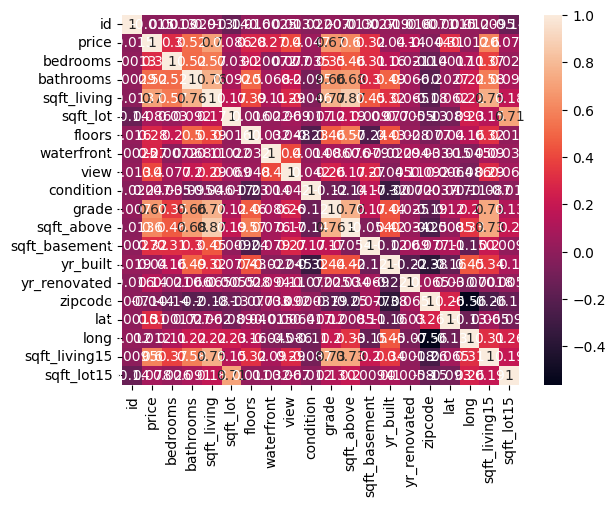

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()


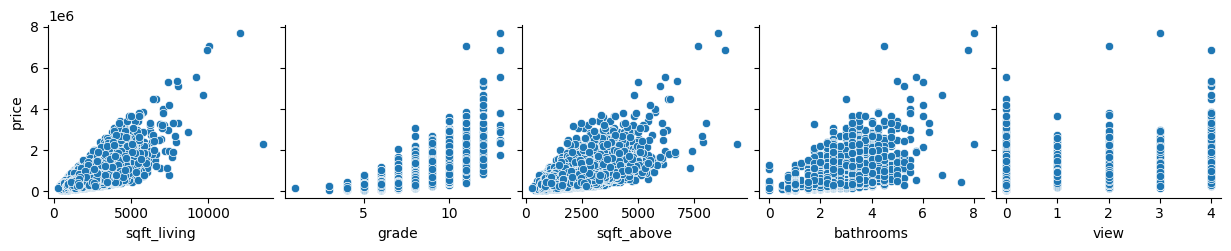

In [ ]:
sns.pairplot(df, x_vars=['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'view'], y_vars=['price'])
plt.show()


In [ ]:
# Remove rows with missing values
df = df.dropna()


# Convert the date column to a pandas datetime object
df['date'] = pd.to_datetime(df['date'])

# Extract year, month, and day features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Drop the original date column
df = df.drop('date', axis=1)

<ipython-input-9-bc2e48182b04>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-9-bc2e48182b04>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year
<ipython-input-9-bc2e48182b04>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [ ]:
from sklearn.metrics import r2_score


In [ ]:

# Split the dataset into training and test sets

X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the training and test sets
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Evaluate the performance of the model
print('Training R^2:', r2_score(y_train, y_pred_train))
print('Test R^2:', r2_score(y_test, y_pred_test))


Training R^2: 0.7002582564601081
Test R^2: 0.7032242859077269
